In [1]:
# Clustering Technique (Kmeans)
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape #check the shape of df


(200, 5)

### Visualization

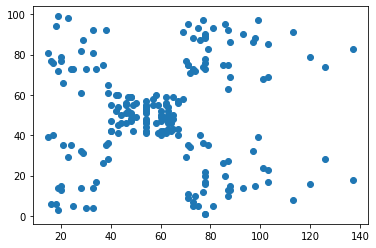

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
np.sqrt(200)

14.142135623730951

In [7]:
from sklearn.cluster import KMeans
k=range(1,15)
sse=[]
for i in k:
    model_demo=KMeans(n_clusters=i,random_state=0)
    model_demo.fit(X)
    sse.append(model_demo.inertia_)
  
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128,
 17702.59593229628,
 15810.838613705502,
 14763.330402558204,
 13165.329070181628]

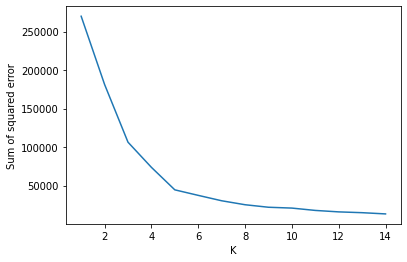

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k,sse)

In [9]:
k=5
model=KMeans(n_clusters=k,random_state=0)
model.fit(X)
y=model.predict(X)
y


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [10]:
model.cluster_centers_ #The number of clusters to form as well as the number of centroids to generate.

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [11]:
model.cluster_centers_[0]

array([88.2       , 17.11428571])

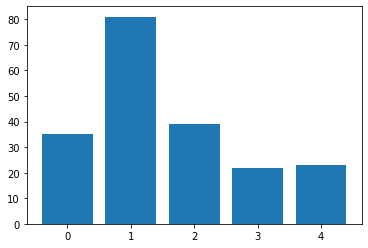

In [12]:
u, c = np.unique(y, return_counts= True)
plt.bar(u, c)
plt.show()

In [13]:
np.sum(c)

200

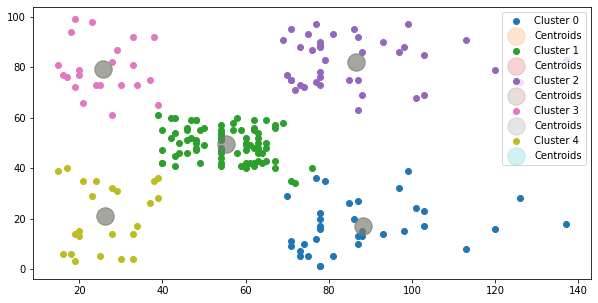

In [14]:
plt.figure(figsize= (10, 5))
for i in range(k):
  plt.scatter(X[y == i, 0], X[y == i, 1], label = f'Cluster {i}')
  plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s= 300, alpha = 0.2, label = 'Centroids')
  plt.legend()

In [15]:
from sklearn.metrics import silhouette_score

2 Clusters =  0.30
3 Clusters =  0.47
4 Clusters =  0.49
5 Clusters =  0.55
6 Clusters =  0.54
7 Clusters =  0.53
8 Clusters =  0.46
9 Clusters =  0.46
10 Clusters =  0.45
11 Clusters =  0.44
12 Clusters =  0.43
13 Clusters =  0.44
14 Clusters =  0.40


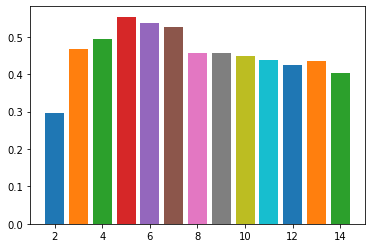

In [16]:
for i in range(2, 15):
  model_demo = KMeans(n_clusters= i, random_state= 0)
  model_demo.fit(X)
  y = model_demo.predict(X)
  print(f'{i} Clusters = {silhouette_score(X, y) : .2f}')
  plt.bar(i, silhouette_score(X, y))
  